/home/jaxa/shintaro/SDF360/dataset/mp360_test/cathedral_undistorted_subset2/sparse/0


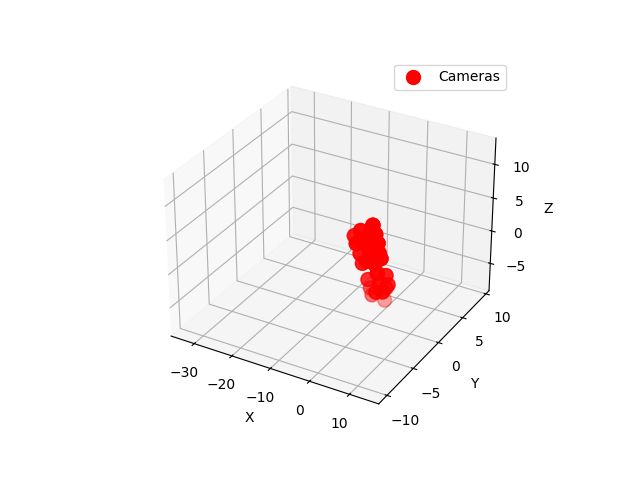

In [20]:
import os
import numpy as np
import pycolmap
%matplotlib widget
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# proj_dir = "/home/jaxa/shintaro/SDF360/dataset/DTU/scan9_colmap"
# proj_dir = "/home/jaxa/shintaro/SDF360/dataset/sdfstudio-demo-data/replica-room0/"
# proj_dir = "/home/jaxa/shintaro/SDF360/dataset/mp360_test/cathedral_new/colmap"
proj_dir = "/home/jaxa/shintaro/SDF360/dataset/mp360_test/cathedral_undistorted_subset2"
# proj_dir = "/home/jaxa/shintaro/SDF360/dataset/mp360_test/church_undistored_subset"
# proj_dir = "/home/jaxa/shintaro/SDF360/dataset/mp360_test/church_new/colmap"
# proj_dir = "/home/jaxa/shintaro/SDF360/dataset/mp360_test/church/colmap"
# proj_dir = "/home/jaxa/shintaro/SDF360/dataset/OmniBlender/barbershop/colmap"

proj_dir = f"{proj_dir}/sparse/0"
print(proj_dir)
# Load COLMAP data using pycolmap
reconstruction = pycolmap.Reconstruction(proj_dir)

# Extract camera rotations
camera_rotations = np.array([reconstruction.images[k].cam_from_world.rotation.matrix() for k in reconstruction.images])

# Extract camera positions
camera_positions = np.array(
    [-reconstruction.images[k].cam_from_world.rotation.matrix().T @ reconstruction.images[k].cam_from_world.translation 
     for k in reconstruction.images])

# Extract 3D points
points = np.array([reconstruction.points3D[k].xyz for k in reconstruction.points3D])

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o', s=1, label='3D Points') # Here!
ax.scatter(camera_positions[:, 0], camera_positions[:, 1], camera_positions[:, 2], c='r', marker='o', s=100, label='Cameras')

all_points = np.vstack((points, camera_positions))  # Combine points and camera positions
ax.set_xlim(np.min(all_points[:, 0]), np.max(all_points[:, 0]))
ax.set_ylim(np.min(all_points[:, 1]), np.max(all_points[:, 1]))
ax.set_zlim(np.min(all_points[:, 2]), np.max(all_points[:, 2]))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


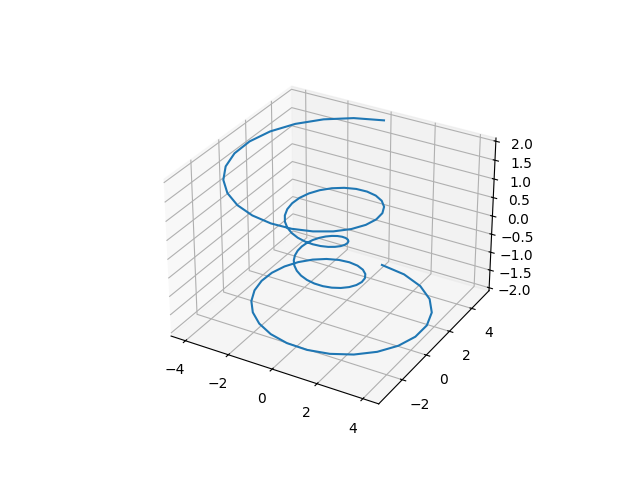

In [1]:
import numpy as np
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    # <- 明示的には使わないが、インポートしておく必要がある。

fig = plt.figure()
ax = fig.add_subplot(projection='3d')    # <- axes3dをインポートしていないとエラーになる。
ax.plot(x, y, z)
plt.show()

In [13]:
import json
import numpy as np
import pycolmap

def convert_opensfm_to_colmap(opensfm_camera_file, opensfm_extrinsics_file, colmap_output_dir):
    # Load OpenSfM camera parameters
    with open(opensfm_camera_file, 'r') as f:
        opensfm_cameras = json.load(f)
    
    # Load OpenSfM extrinsics
    with open(opensfm_extrinsics_file, 'r') as f:
        opensfm_extrinsics = json.load(f)
    
    # Create COLMAP reconstruction object
    reconstruction = pycolmap.Reconstruction()
    
    # Convert cameras
    for cam_id, cam_params in opensfm_cameras.items():
        model = cam_params['projection_type']
        width = cam_params['width']
        height = cam_params['height']
        
        if model == 'perspective':
            params = cam_params['parameters']
            model_id = pycolmap.CameraModelId.SIMPLE_PINHOLE
            colmap_params = [params['focal'], width / 2, height / 2]
        elif model == 'brown':
            params = cam_params['parameters']
            model_id = pycolmap.CameraModelId.BROWN
            colmap_params = [
                params['focal_x'], params['focal_y'], params['c_x'], params['c_y'],
                params['k1'], params['k2'], params['p1'], params['p2'], params['k3']
            ]
        elif model == 'spherical':
            # spherical だとしても，perspective と同じとして扱う
            # model_id = pycolmap.CameraModel.SPHERICAL
            # colmap_params = []  # Spherical model does not require additional parameters
            model_id = pycolmap.CameraModelId.SIMPLE_PINHOLE
            colmap_params = [1.0, width / 2, height / 2]
        else:
            raise ValueError(f"Unsupported camera model: {model}")
        
        camera = pycolmap.Camera(model_id, width, height, colmap_params)
        reconstruction.add_camera(camera)
    
    # Convert extrinsics
    for img_id, extrinsics in opensfm_extrinsics.items():
        rotation = np.array(extrinsics['rotation'])
        translation = np.array(extrinsics['translation'])
        
        # Convert rotation matrix to quaternion
        quaternion = pycolmap.Rotation.from_matrix(rotation).as_quat()
        
        # Create COLMAP image object
        image = pycolmap.Image(
            id=int(img_id),
            camera_id=int(extrinsics['camera_id']),
            qvec=quaternion,
            tvec=translation,
            name=extrinsics['image_name']
        )
        reconstruction.add_image(image)
    
    # Save COLMAP reconstruction
    reconstruction.write(colmap_output_dir)

# Example usage
# proj_dir = '/home/jaxa/shintaro/SDF360/dataset/mp360_test/cathedral'
proj_dir = '/home/jaxa/shintaro/SDF360/dataset/DTU/scan9_opensfm'
opensfm_camera_file = f'{proj_dir}/camera_models.json'
opensfm_extrinsics_file = f'{proj_dir}/reconstruction.json'
colmap_output_dir = f'{proj_dir}/colmap/output'

convert_opensfm_to_colmap(opensfm_camera_file, opensfm_extrinsics_file, colmap_output_dir)

KeyError: 'parameters'

0.0 6.283185307179586
S.shape:  (100, 200)
S.sum():  1.0000000000000002
S max:  9.60575416440914e-05
S min:  8.471493430997705e-06
tensor([44, 55, 32,  ..., 54, 31, 47]) tensor([158,  73, 147,  ...,  77, 113, 175])


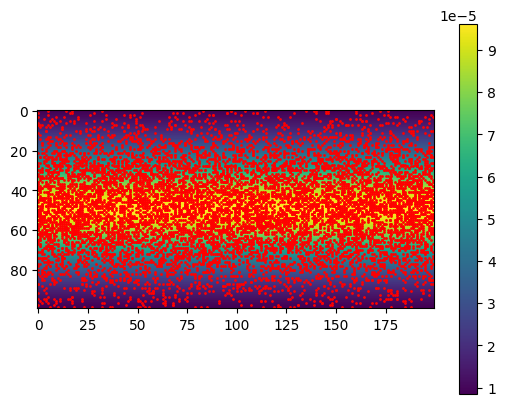

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch

plt.close()

def softmax(x):
    x_max = x.max()
    return np.exp(x - x_max) / np.sum(np.exp(x - x_max))

PI = np.pi
H, W = 100, 200

pixels_x = np.linspace(0, W, num=W+1)
pixels_y = np.linspace(0, H, num=H+1)

lon = 2 * PI * pixels_x[:, None] / W # (0, 2pi)
lat = -PI * (0.5 * H - (pixels_y[:, None])) / H  # (-pi/2, pi/2)

print(lon.min(), lon.max())

lon_diff = np.diff(lon, axis=0)
sin_lat_diff = np.diff(np.sin(lat), axis=0)
S = sin_lat_diff * lon_diff.T

# 最初に書いたコード
# S = []
# for i in range(H):
#     s = []
#     for j in range(W):
#       ss = (lon[j+1] - lon[j]) * (np.sin(lat[i+1]) - np.sin(lat[i]))
#       s.append(ss)
#     S.append(s)   
    
S = np.stack(S, axis=0)
scale = 2500
S = softmax(S*scale)
print('S.shape: ', S.shape)
print('S.sum(): ', S.sum())
print('S max: ', S.max())
print('S min: ', S.min())

plt.imshow(S.squeeze(), cmap='viridis')
plt.colorbar()

sample_idx = torch.multinomial(torch.tensor(S.flatten()), num_samples=10000, replacement=True)
print(sample_idx // W, sample_idx % W)

plt.plot(sample_idx % W, sample_idx // W, 'ro', markersize=1)
plt.show()

# # 緯度方向でのサンプリング頻度の変化を折れ線グラフとして描画
# mean_prob_per_lat = S.mean(axis=1)  # 緯度方向での確率の平均

# plt.figure(figsize=(8, 6))
# plt.plot(mean_prob_per_lat, label='Mean Probability per Latitude', color='b')
# plt.title('Mean Probability Distribution Along Latitude')
# plt.xlabel('Latitude index')
# plt.ylabel('Mean Probability')
# plt.legend()
# plt.grid(True)
# plt.show()



r_np (8, 3, 3)
t_np (8, 3)
[[-0.23643278 -0.06426991 -0.02646812]
 [ 0.04277237 -0.4655893  -0.02567006]
 [-0.34715393  0.10617804 -0.02831688]
 [-0.06610883  0.10344482 -0.02517901]
 [ 0.45715928 -0.12045781 -0.02415055]
 [ 0.22324201 -0.2213259  -0.02356805]
 [ 0.19783197  0.28255558 -0.02481521]
 [-0.03997811  0.38954744 -0.02563287]]


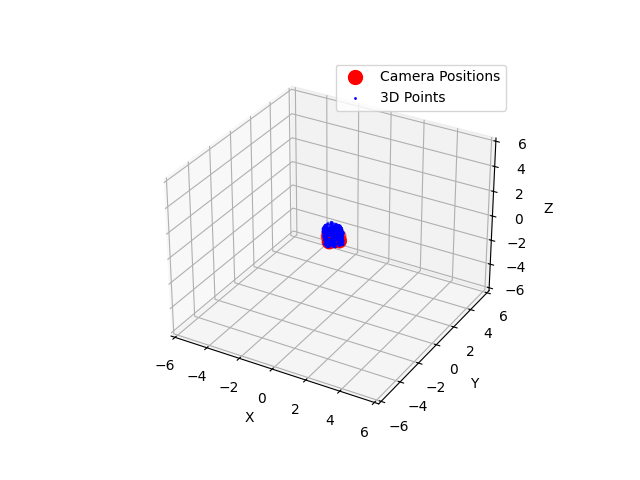

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.close()
pose = np.load('/home/jaxa/shintaro/SDF360/debug/pose_church_renew.npy')
vertices = np.load('/home/jaxa/shintaro/SDF360/debug/church_renew241014_vertices.npy')
# pose = np.load('/home/jaxa/shintaro/SDF360/cathedral_undistorted_subset2_pose.npy')
# vertices = np.load('/home/jaxa/shintaro/SDF360/cathedral_undistorted_subset2_vertices.npy')

r, t = [], []
for rt in pose:
    r.append(rt[:3, :3]) # c2w（カメラを世界座標に持っていく）
    t.append(rt[:3, 3]) # c2w
    # r.append(rt[:3, :3].T) # c2w（カメラを世界座標に持っていく）
    # t.append(rt[:3, :3].T @ rt[:3, 3] - rt[:3, 3]) # c2w
    
r_np = np.stack(r, axis=0)
t_np = np.stack(t, axis=0)

print("r_np", r_np.shape)
r_np

print("t_np", t_np.shape)
t_np

%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scale = 1

# Plot camera positions
# scale = 4.2575774 # church_renew
# shift = np.array([0.9736604 , 0.24170792, 0.09947336])

# scale = 8.347793 # cathedral_undistorted_subset2
# shift = np.array([ 0.09641838, -2.768753  , -0.16458225])
# t_np = (t_np - shift[None, :]) / scale

print(t_np*scale)

ax.scatter(t_np[:, 0], t_np[:, 1], t_np[:, 2], c='r', marker='o', s=100, label='Camera Positions')

# Plot camera orientations
for i in range(len(t_np)):
    ax.quiver(t_np[i, 0], t_np[i, 1], t_np[i, 2], r_np[i, 0, 0], r_np[i, 1, 0], r_np[i, 2, 0], color='b', length=0.2, normalize=True) # X
    ax.quiver(t_np[i, 0], t_np[i, 1], t_np[i, 2], r_np[i, 0, 1], r_np[i, 1, 1], r_np[i, 2, 1], color='r', length=0.2, normalize=True) # Y
    ax.quiver(t_np[i, 0], t_np[i, 1], t_np[i, 2], r_np[i, 0, 2], r_np[i, 1, 2], r_np[i, 2, 2], color='g', length=0.2, normalize=True) # Z

import pycolmap
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='b', marker='o', s=1, label='3D Points') # Here!

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(-6, 6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()
    